## 소리 구분해보기
* 안녕하세요*3 소리파일 불러와서 1초간격으로 자름 그리고 label후 학습 연습

### 1. file_list

In [1]:
import os
import numpy as np

file_dir = "C:/Users/User/Desktop/sound_data/wav_data/hello/"
file_list = np.array([])
for file in os.listdir(file_dir):
    file_list = np.append(file_list,file)

### 2. sample_list

In [2]:
from scipy.io import wavfile

sample_list = []
sample_rate = 44100
for file in file_list:
    sample_rate,sample_data = wavfile.read(file_dir+file)
    sample_list.append(sample_data)

### 3. visualize

Text(0, 764.8070768950305, '765')

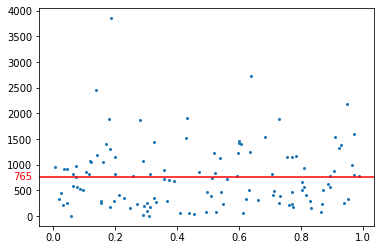

In [76]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np; np.random.seed(42)

N = 120
x = np.random.rand(N)
y = np.abs(np.random.normal(size=N))*1000
mean= np.mean(y)

fig, ax=plt.subplots()
ax.plot(x,y, ls="", marker="o", markersize=2)
ax.axhline(y=mean, color="red")

trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,mean, "{:.0f}".format(mean), color="red", transform=trans,ha="right", va="center")

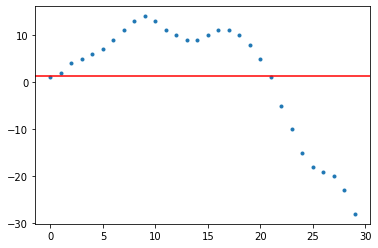

In [60]:
import matplotlib.pyplot as plt
plt.scatter(range(30),sample_list[0][0:30],marker='.')
plt.axhline(y=sample_list[0][0:30].mean(), color='r', linestyle='-')
plt.show()

In [57]:
sample_list[0][0:30].mean()

1.4

In [31]:
a = fftpack.fft(sample_list[0])

In [38]:
len(sample_list[0])/44100

4.551111111111111

In [40]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [44]:
int(f'1{size}{i}')

140

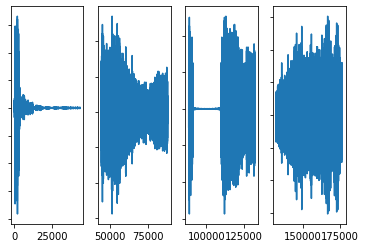

In [56]:
size = len(sample_list[0])//44100
for i in range(size):
    plt.subplot(int(f'1{size}{i+1}'))
    plt.plot(range(44100*i,44100*(i+1)),fftpack.fft(sample_list[0])[44100*i:44100*(i+1)])
    plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [78]:
sample_list[0]/

array([  1,   2,   4, ..., 218, 213, 197], dtype=int16)

In [80]:
import librosa
y = sample_list[0]/(2**15-1)
sr = 44100
spectral_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

In [101]:
from keras import models,layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(30,)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(4, activation='softmax'))

In [102]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               7936      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 260       
Total params: 49,348
Trainable params: 49,348
Non-trainable params: 0
_________________________________________________________________


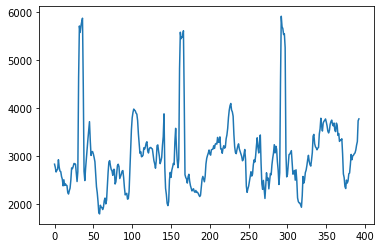

In [95]:
# plt.plot(sample_list[0],alpha = 0.4)
plt.plot(spectral_bw[0])
plt.show()

In [94]:
spectral_bw.shape

(1, 393)

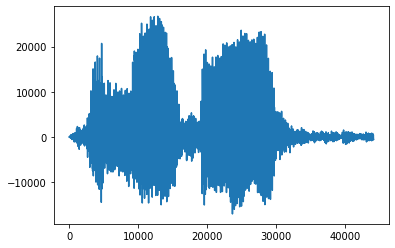

In [39]:
plt.plot(sample_list[0][0:44100])

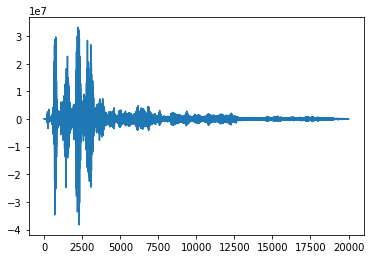

In [32]:
plt.plot(a[0:20000])

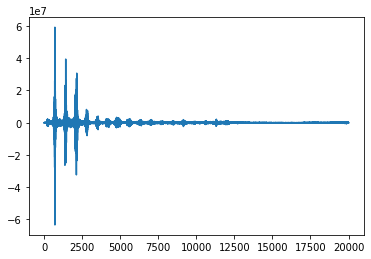

In [30]:
plt.plot(a[0:20000])

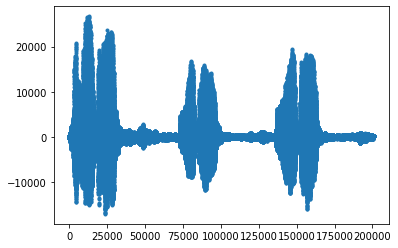

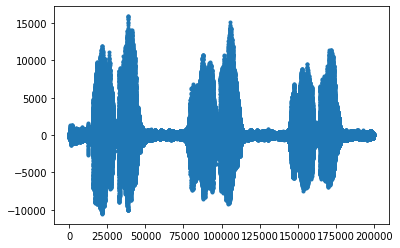

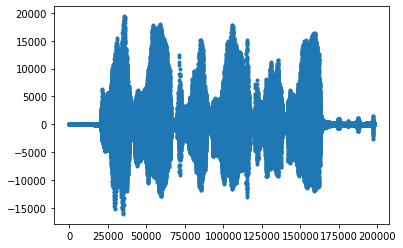

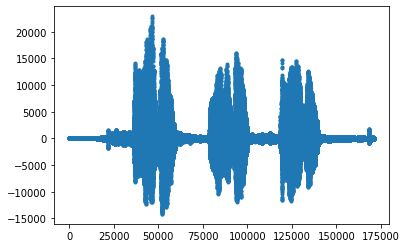

In [19]:
import matplotlib.pyplot as plt

for i in sample_list:
    plt.scatter(range(len(i)),i,marker='.')
    plt.show()

### 4. sample_rate*1.5(1.5초단위로 잘라내기)

* 1.5초 적절한지

In [33]:
import simpleaudio as sa
sa.WaveObject(sample_list[1][0:int(sample_rate*1.5)],1,2,sample_rate).play()

In [156]:
X = np.zeros(shape=(0,))
for sample in sample_list:
    for n in range(len(sample)//int(1.5*sample_rate)):
        X = np.concatenate((X,sample[int(1.5*sample_rate)*n:int(1.5*sample_rate)*(n+1)]))

X = X.reshape(-1,int(sample_rate*1.5))

### 5. fft_X

In [20]:
from scipy import fftpack

In [200]:
X_fft = fftpack.fft(X)

In [46]:
count = []
for sample in sample_list:
    count.append(len(sample)//int(1.5*sample_rate))

### count_to_onehot
* [2,1,1] -> [[1,0,0],[1,0,0],[0,1,0],[0,0,1]]

In [118]:
def count_to_onehot(count):
    size=len(count)
    result = np.empty(shape=(0,))
    
    for i,con in enumerate(count):
        for n in range(con):
            pre = np.append(np.zeros(i),1)
            final = np.append(pre,np.zeros(size-1-i))
            result = np.concatenate((result,final))
    return result.reshape(-1,4)


In [119]:
y = count_to_onehot(count)

In [159]:
y.shape

(10, 4)

### X,y 로 학습하기

In [249]:
input_size = int(sample_rate*1.5)
d_range = int(sample_rate*1.5)

* ### 기본형

In [169]:
from keras import models
from keras import layers

network = models.Sequential()
# node수, input(모양,갯수(모를떈None))
network.add(layers.Dense(512,activation='relu',input_shape=(int(sample_rate*1.5),)))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(4,activation='softmax'))

network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [231]:
network_fit = network.fit(X_fft,y,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/5
10/10 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
10/10 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
for i,sample in enumerate(sample_list):
    print("sample")
    for x in range(0,len(sample)-d_range,10000):
        if False==(network.predict(fftpack.fft(sample[x:x+d_range])[np.newaxis,])==y[i][np.newaxis,]).all():
            print("false")

>#### 실패..
* 데이터가 적어서
* 1.5 sample_rate가 짧아서

## MFC(Mel-Frequency-Cepstral)

In [2]:
import speech_recognition as sr
import librosa

In [10]:
sample_list[0]

array([  1,   2,   4, ..., 218, 213, 197], dtype=int16)

In [31]:
X = librosa.stft(sample_list[0]/(2**15-1))
# librosa.feature.mfcc(sample_list[0])

In [106]:
a = [librosa.stft(i/(2**15-1),n_fft=16) for i in sample_list]

In [107]:
for i in a:
    print(i.shape)

(9, 50177)
(9, 49921)
(9, 49409)
(9, 42753)


In [103]:
for i,j in zip(sample_list,a):
    print(np.ceil(len(i)/1025)*2,j.shape[1])

392.0 393
390.0 391
386.0 387
334.0 335


In [100]:
len(sample_list[0]),a[0].shape[1]*(1+1024)

(200704, 402825)

In [86]:
import matplotlib.pyplot as plt

In [32]:
X.shape

(1025, 393)

In [23]:
sample_rate/393

112.21374045801527

In [17]:
393

393

* ### LSTM

In [133]:
import keras
from keras import models
from keras.layers import LSTM, Dropout,Embedding, Dense, Input
from keras import regularizers

In [147]:
from keras.layers import Input,Dense,Embedding,Flatten
from keras.models import Model

inputs = Input(shape=(None,))
embedding = Embedding(input_dim = 2**16,output_dim = 8, input_length = 4)(inputs)
output1 = Flatten()(embedding)
output2 = Dense(32,activation = 'relu')(output1)
predictions = Dense(1,activation='sigmoid')(output2)

api_model = Model(inputs=inputs,outputs = predictions)
api_model.compile(optimizer='rmsprop',loss='catgorical_crossentropy',metrics=['acc'])

In [147]:

# api_model.summary()
api_model.fit(X,y,epochs=10,batch_size=32,validation_split=0.2)

NameError: name 'X_train' is not defined

In [150]:
api_model.fit(X,y,epochs=10)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 10 arrays: [array([[  1],
       [  2],
       [  4],
       ...,
       [152],
       [120],
       [107]], dtype=int16), array([[108],
       [129],
       [147],
       ...,
       [599],
       [568],
      ...

In [134]:
X

[array([  1,   2,   4, ..., 152, 120, 107], dtype=int16),
 array([108, 129, 147, ..., 599, 568, 531], dtype=int16),
 array([517, 476, 461, ..., -25,  -5,  13], dtype=int16),
 array([ 0, -1,  0, ..., 83, 66, 49], dtype=int16),
 array([ 47,  37,  48, ..., 256, 247, 224], dtype=int16),
 array([209, 196, 181, ...,  40,  27,  12], dtype=int16),
 array([   0,    0,    0, ..., -269, -279, -322], dtype=int16),
 array([-300, -323, -331, ..., 7833, 7779, 6960], dtype=int16),
 array([ 0,  0,  0, ...,  2, 16,  4], dtype=int16),
 array([  -10,   -12,   -20, ..., -3303, -2441, -1484], dtype=int16)]